In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

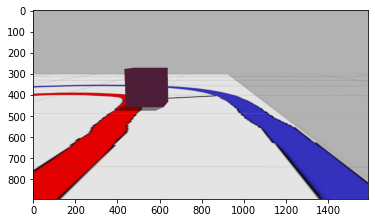

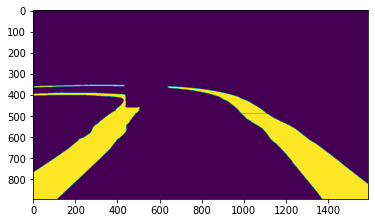

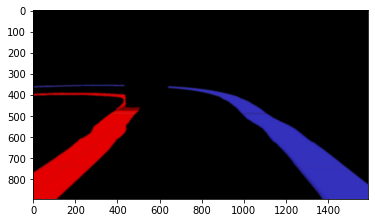

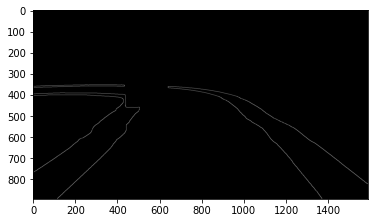

In [7]:
def laneDetection():
    
    # Read image 
    address = r'C:/Users/profi/Downloads/obstacle_before_bend.JPG'
    img0 = cv2.imread(address);
    img1 = cv2.imread(address);
    img2 = cv2.imread(address);
    
    # Extract binary mask covering the lanes
    leftColorMask, leftBinaryMask, leftEdge = blueMask(img1); 
    rightColorMask, rightBinaryMask, rightEdge = redMask(img2); 
    
    # Combine left and right lanes
    bothEdges = leftEdge + rightEdge;
    bothBinary = leftBinaryMask + rightBinaryMask;
    bothColor = leftColorMask + rightColorMask;

    # Display figures
    plt.figure(); plt.imshow(img0);
    plt.figure(); plt.imshow(bothColor);
    plt.figure(); plt.imshow(bothBinary)
    plt.figure(); plt.imshow(bothEdges, cmap='gray');
    
laneDetection()

In [2]:
def blueMask(image): 
    # Convert RGB image to YCrCb color space
    ycrcb_color = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb);
    # Convert YCrCb image to YCbCr; change type to float
    ycbcr_color = ycrcb_color[:,:,(0,2,1)].astype(np.float32);
    # Rescale from [0,255] to [16,235] for Y and [16,240] for Cb/Cr
    ycbcr_color[:,:,0] = (ycbcr_color[:,:,0]*(235-16)/255.0) + 16.0;
    ycbcr_color[:,:,1:] = (ycbcr_color[:,:,1:]*(240-16)/255.0) + 16.0;

    # Define thresholds for color channels based on histogram settings (from MATLAB)
    YChannelMin = 0.000; YChannelMax = 154.000;
    CbChannelMin = 175.000; CbChannelMax = 255.000;
    CrChannelMin = 107.000; CrChannelMax = 140.000;
    
    I = ycbcr_color;
    # Create mask based on chosen histogram thresholds
    colorMask = (I[:,:,0] >= YChannelMin) & (I[:,:,0] <= YChannelMax) & \
         (I[:,:,1] >= CbChannelMin) & (I[:,:,1] <= CbChannelMax) & \
         (I[:,:,2] >= CrChannelMin) & (I[:,:,2] <= CrChannelMax);
    
    # Initialize output masked image based on input image
    binaryMask = image;

    # Set background pixels where BW is false to zero
    # Implementation found at https://stackoverflow.com/questions/32238227/numpy-tile-did-not-work-as-matlab-repmat
    import numpy.matlib
    colorMask_not = (colorMask!=bool(1)) ;
    a = np.tile(colorMask_not[..., None], [1, 1, 3]);
    binaryMask[a] = 0;

    # Remove noise in image with a Gaussian filter
    binaryMask = cv2.GaussianBlur(binaryMask,(13,13),0);
    # cv2.dilate() may also be used if necessary
   
    # Use Canny edge detector to extract edges from binary mask
    # More information at
    # https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html
    laneEdge = cv2.Canny(binaryMask,100,200,3, L2gradient=True);
    
    return colorMask, binaryMask, laneEdge

In [3]:
def redMask(image): 
    # Convert RGB image to YCrCb color space
    ycrcb_color = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb);
    # Convert YCrCb image to YCbCr; change type to float
    ycbcr_color = ycrcb_color[:,:,(0,2,1)].astype(np.float32);
    # Rescale from [0,255] to [16,235] for Y and [16,240] for Cb/Cr
    ycbcr_color[:,:,0] = (ycbcr_color[:,:,0]*(235-16)/255.0) + 16.0;
    ycbcr_color[:,:,1:] = (ycbcr_color[:,:,1:]*(240-16)/255.0) + 16.0;

    # Define thresholds for color channels based on histogram settings (from MATLAB)
    YChannelMin = 0.000; YChannelMax = 106.000;
    CbChannelMin = 82.000; CbChannelMax = 121.000;
    CrChannelMin = 157.000; CrChannelMax = 200.000;
    
    I = ycbcr_color;
    # Create mask based on chosen histogram thresholds
    colorMask = (I[:,:,0] >= YChannelMin) & (I[:,:,0] <= YChannelMax) & \
         (I[:,:,1] >= CbChannelMin) & (I[:,:,1] <= CbChannelMax) & \
         (I[:,:,2] >= CrChannelMin) & (I[:,:,2] <= CrChannelMax);
    
    # Initialize output masked image based on input image
    binaryMask = image;

    # Set background pixels where BW is false to zero
    # Implementation found at https://stackoverflow.com/questions/32238227/numpy-tile-did-not-work-as-matlab-repmat
    import numpy.matlib
    colorMask_not = (colorMask!=bool(1)) ;
    a = np.tile(colorMask_not[..., None], [1, 1, 3]);
    binaryMask[a] = 0;

    # Remove noise in image with a Gaussian filter
    binaryMask = cv2.GaussianBlur(binaryMask,(13,13),0);
    # cv2.dilate() may also be used if necessary
   
    # Use Canny edge detector to extract edges from binary mask
    laneEdge = cv2.Canny(binaryMask,100,200,3, L2gradient=True);
    
    return colorMask, binaryMask, laneEdge